In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F

import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd

plt.style.use("dark_background")

## Burayı mahevttik, düzelt

In [ ]:
dataset = sns.load_dataset("iris")
dataset

In [ ]:
class ANNiris(nn.Module):
    def __init__(self, nUnits, nLayers):
        super().__init__()
        self.layers = nn.ModuleDict()
        self.nLayers = nLayers

        self.layers["input"] = nn.Linear(4, nUnits)

        for i in range(self.nLayers):
            self.layers[f"hidden{i}"] = nn.Linear(nUnits, nUnits)

        self.layers["output"] = nn.Linear(nUnits, 3)

    def forward(self, x):
        x = self.layers["input"](x)

        for i in range(self.nLayers):
            x = F.relu( self.layers[f"hidden{i}"](x) )

        x = self.layers["output"](x)

        return x

In [ ]:
nUnits = 12
nLayers = 4
testModel = ANNiris(12, 4)

randomMatrix = torch.randn(10, 4)
y_pred = testModel(randomMatrix)
y_pred

tensor([[ 0.0144, -0.0070, -0.2259],
        [ 0.0117, -0.0109, -0.2235],
        [ 0.0222,  0.0021, -0.2258],
        [ 0.0207,  0.0061, -0.2232],
        [ 0.0128,  0.0053, -0.2225],
        [ 0.0137,  0.0042, -0.2304],
        [ 0.0150,  0.0049, -0.2241],
        [ 0.0174, -0.0041, -0.2190],
        [ 0.0106, -0.0003, -0.2250],
        [ 0.0102, -0.0096, -0.2229]], grad_fn=<AddmmBackward0>)

In [ ]:
testModel

ANNiris(
  (layers): ModuleDict(
    (input): Linear(in_features=4, out_features=12, bias=True)
    (hidden0): Linear(in_features=12, out_features=12, bias=True)
    (hidden1): Linear(in_features=12, out_features=12, bias=True)
    (hidden2): Linear(in_features=12, out_features=12, bias=True)
    (hidden3): Linear(in_features=12, out_features=12, bias=True)
    (output): Linear(in_features=12, out_features=3, bias=True)
  )
)

In [ ]:
def trainTheModel(model: nn.Module, epochs, info=True):
    criterion = nn.CrossEntropyLoss()
    optimizer = torch.optim.Adam(model.parameters())

    for i in range(epochs):

        # loss
        y_pred = model(data)
        loss = criterion(y_pred, labels)

        # backprop
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        if info == True and epochs % 10:
            print(f"Epoch: {i + 1} ................................................./ Loss:{loss:.4f}")

    # acc
    y_pred = model(data)
    matches = torch.argmax(y_pred, axis=1) == labels.flatten()
    matchesNum = matches.float()
    accPercentage = 100 * torch.mean(matchesNum)

    return accPercentage

In [ ]:
layerNrs = np.arange(1, 6, 1)
unitNrs = np.arange(1, 101, 3),
for i, l in enumerate(layerNrs):
    for j, u in enumerate(unitNrs):
        model = ANNiris(l, u)
        acc = trainTheModel(model, 200)
        accByLayerAndUnit[i, j] = acc
        # lossByLayerAndUnit[i, j] =
    print(f"\n\nlayerNrs: {l}/{np.max(layerNrs)} Completed\n\n")




layerNrs: 1/5 Completed




layerNrs: 2/5 Completed




layerNrs: 3/5 Completed




layerNrs: 4/5 Completed




layerNrs: 5/5 Completed




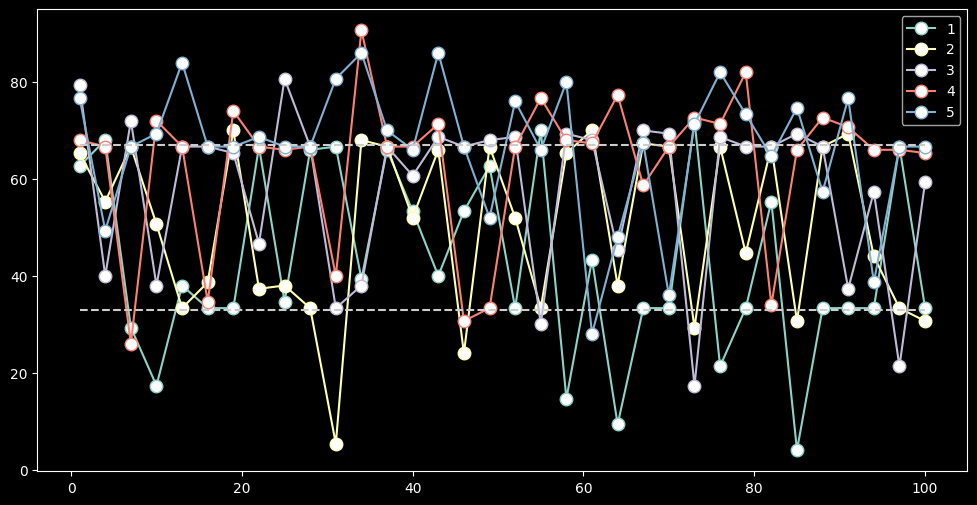

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(unitNrs, accByLayerAndUnit.T, "o-", markerfacecolor="w", markersize=9)
plt.plot(unitNrs[[0,-1]],[33,33],'--',color=[.8,.8,.8])
plt.plot(unitNrs[[0,-1]],[67,67],'--',color=[.8,.8,.8])
plt.legend(layerNrs)